<a href="https://colab.research.google.com/github/Juno-Maria-Joseph/OIBSIP/blob/main/Customer_Segmentation_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Customer Segmentation Analysis**

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
# load dataset
csa_df = pd.read_csv('/content/ifood_df.csv')


In [ ]:
#Taking a look at the top 5 rows of the data
csa_df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [ ]:
# Display basic information about the dataset
print(csa_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [ ]:
# Display summary statistics
print(csa_df.describe())

              Income      Kidhome     Teenhome      Recency     MntWines  \
count    2205.000000  2205.000000  2205.000000  2205.000000  2205.000000   
mean    51622.094785     0.442177     0.506576    49.009070   306.164626   
std     20713.063826     0.537132     0.544380    28.932111   337.493839   
min      1730.000000     0.000000     0.000000     0.000000     0.000000   
25%     35196.000000     0.000000     0.000000    24.000000    24.000000   
50%     51287.000000     0.000000     0.000000    49.000000   178.000000   
75%     68281.000000     1.000000     1.000000    74.000000   507.000000   
max    113734.000000     2.000000     2.000000    99.000000  1493.000000   

         MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
count  2205.000000      2205.000000      2205.000000       2205.000000   
mean     26.403175       165.312018        37.756463         27.128345   
std      39.784484       217.784507        54.824635         41.130468   
min       0.000000 

In [ ]:
csa_df.shape

(2205, 39)

In [ ]:
csa_df.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')

In [ ]:
csa_df.isnull()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2201,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2202,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2203,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
csa_df.isnull().sum()

,0
Income,0
Kidhome,0
Teenhome,0
Recency,0
MntWines,0
MntFruits,0
MntMeatProducts,0
MntFishProducts,0
MntSweetProducts,0
MntGoldProds,0


In [ ]:
csa_df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
2200,False
2201,True
2202,False
2203,False


In [ ]:
csa_df.duplicated().sum()

184

In [ ]:
csa_df

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,61223.0,0,1,46,709,43,182,42,118,247,...,0,0,0,0,1,0,0,1094,847,0
2201,64014.0,2,1,56,406,0,30,0,0,8,...,1,0,0,0,0,0,1,436,428,1
2202,56981.0,0,0,91,908,48,217,32,12,24,...,0,0,0,0,1,0,0,1217,1193,1
2203,69245.0,0,1,8,428,30,214,80,30,61,...,1,0,0,0,0,1,0,782,721,0


In [ ]:
csa_df.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')

Income: Customer's income.

Kidhome, Teenhome: Number of children and teenagers in the household.

Age: Customer's age.

Customer_Days: Likely refers to the number of days the customer has been active.

marital_*: Marital status categories (e.g., marital_Divorced, marital_Married, etc.).

education_*: Education level categories (e.g., education_Graduation, education_Master, etc.).

Recency: Days since the last purchase.

MntWines, MntFruits, MntMeatProducts, etc.: Money spent on various product categories.

MntTotal: Total amount spent.

NumDealsPurchases: Number of purchases using deals.

NumWebPurchases, NumCatalogPurchases, NumStorePurchases: Number of purchases made via web, catalog, and in-store.

NumWebVisitsMonth: Number of website visits per month.

AcceptedCmp1, AcceptedCmp2, etc.: Whether the customer accepted specific marketing campaigns.

AcceptedCmpOverall: Overall campaign acceptance.

Complain: Whether the customer has made a complaint.

Response: Response to the most recent campaign.



In [ ]:
csa_df.nunique()

,0
Income,1963
Kidhome,3
Teenhome,3
Recency,100
MntWines,775
MntFruits,158
MntMeatProducts,551
MntFishProducts,182
MntSweetProducts,176
MntGoldProds,212


In [ ]:
# Remove duplicates
cns_df_no_dup = csa_df.drop_duplicates()
print("\nDataFrame After Removing Duplicates(default):")
print(cns_df_no_dup)


DataFrame After Removing Duplicates(default):
       Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0     58138.0        0         0       58       635         88   
1     46344.0        1         1       38        11          1   
2     71613.0        0         0       26       426         49   
3     26646.0        1         0       26        11          4   
4     58293.0        1         0       94       173         43   
...       ...      ...       ...      ...       ...        ...   
2198  26816.0        0         0       50         5          1   
2200  61223.0        0         1       46       709         43   
2202  56981.0        0         0       91       908         48   
2203  69245.0        0         1        8       428         30   
2204  52869.0        1         1       40        84          3   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  ...  \
0                 546              172                88            88  ...   
1 

In [ ]:
# Remove all duplicates
cns_df_no_dup_all = csa_df.drop_duplicates(keep=False)
print("\nDataFrame After Removing All Duplicates:")
print(cns_df_no_dup_all)



DataFrame After Removing All Duplicates:
       Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0     58138.0        0         0       58       635         88   
1     46344.0        1         1       38        11          1   
2     71613.0        0         0       26       426         49   
3     26646.0        1         0       26        11          4   
4     58293.0        1         0       94       173         43   
...       ...      ...       ...      ...       ...        ...   
2198  26816.0        0         0       50         5          1   
2200  61223.0        0         1       46       709         43   
2202  56981.0        0         0       91       908         48   
2203  69245.0        0         1        8       428         30   
2204  52869.0        1         1       40        84          3   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  ...  \
0                 546              172                88            88  ...   
1      

In [ ]:
# Remove all duplicates in the dataset
cns_df_no_dup_all = csa_df.drop_duplicates(keep=False)

# Output the result after removing all duplicates
cns_df_no_dup_all.shape, cns_df_no_dup_all.head()

((1843, 39),
     Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
 0  58138.0        0         0       58       635         88              546   
 1  46344.0        1         1       38        11          1                6   
 2  71613.0        0         0       26       426         49              127   
 3  26646.0        1         0       26        11          4               20   
 4  58293.0        1         0       94       173         43              118   
 
    MntFishProducts  MntSweetProducts  MntGoldProds  ...  marital_Together  \
 0              172                88            88  ...                 0   
 1                2                 1             6  ...                 0   
 2              111                21            42  ...                 1   
 3               10                 3             5  ...                 1   
 4               46                27            15  ...                 0   
 
    marital_Widow  education_

In [ ]:
# Reattempt removing all duplicates and outputting the DataFrame without any duplicates
cns_df_no_dup_all = csa_df.drop_duplicates(keep=False)

# Display the shape (number of rows and columns) and the first few rows of the cleaned DataFrame
cns_df_no_dup_all.shape, cns_df_no_dup_all.head()


((1843, 39),
     Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
 0  58138.0        0         0       58       635         88              546   
 1  46344.0        1         1       38        11          1                6   
 2  71613.0        0         0       26       426         49              127   
 3  26646.0        1         0       26        11          4               20   
 4  58293.0        1         0       94       173         43              118   
 
    MntFishProducts  MntSweetProducts  MntGoldProds  ...  marital_Together  \
 0              172                88            88  ...                 0   
 1                2                 1             6  ...                 0   
 2              111                21            42  ...                 1   
 3               10                 3             5  ...                 1   
 4               46                27            15  ...                 0   
 
    marital_Widow  education_

In [ ]:
cns_df_no_dup_all[cns_df_no_dup_all.duplicated()]

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall


In [ ]:
cns_df_no_dup_all

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2198,26816.0,0,0,50,5,1,6,3,4,3,...,0,0,0,0,1,0,0,19,16,0
2200,61223.0,0,1,46,709,43,182,42,118,247,...,0,0,0,0,1,0,0,1094,847,0
2202,56981.0,0,0,91,908,48,217,32,12,24,...,0,0,0,0,1,0,0,1217,1193,1
2203,69245.0,0,1,8,428,30,214,80,30,61,...,1,0,0,0,0,1,0,782,721,0


**Outliers**

In [ ]:
cns_df_no_dup_all.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,...,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000
mean,51755.752577,0.443842,0.512751,48.734129,307.167119,26.308193,166.813348,37.400977,27.416712,43.837222,...,0.244710,0.034726,0.091156,0.023874,0.500271,0.166576,0.218123,565.106348,521.269126,0.305480
std,20727.936663,0.534853,0.548639,28.951696,337.913890,39.733319,222.103689,54.895591,42.066386,51.690589,...,0.430032,0.183135,0.287909,0.152698,0.500136,0.372698,0.413083,577.679708,555.773676,0.680508
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.000000
25%,35683.000000,0.000000,0.000000,24.000000,23.500000,2.000000,16.000000,2.500000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000,42.000000,0.000000
50%,51650.000000,0.000000,0.000000,49.000000,179.000000,8.000000,68.000000,12.000000,8.000000,24.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,344.000000,290.000000,0.000000
75%,68145.000000,1.000000,1.000000,74.000000,508.000000,33.000000,225.000000,50.000000,34.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.500000,883.000000,0.000000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,197.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.000000


<ipython-input-23-d6ff41e80ac3>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=cns_df_no_dup_all['Income'],hist=False)


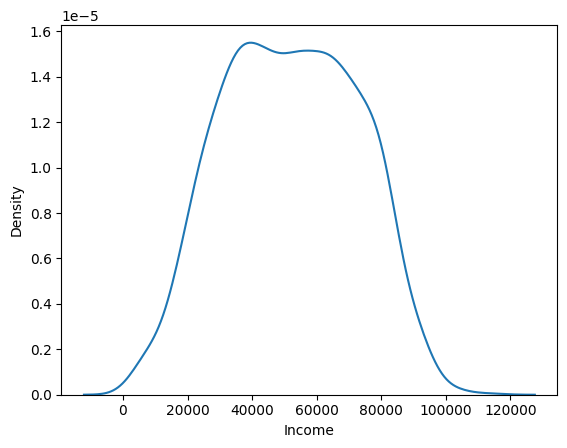

In [ ]:
sns.distplot(a=cns_df_no_dup_all['Income'],hist=False)
plt.show()

In [ ]:
cns_df_no_dup_all.describe([.01,.1,.2,.3,.4,.5,.6,.7,.8,.85,.9,.95,.99])

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,...,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000
mean,51755.752577,0.443842,0.512751,48.734129,307.167119,26.308193,166.813348,37.400977,27.416712,43.837222,...,0.244710,0.034726,0.091156,0.023874,0.500271,0.166576,0.218123,565.106348,521.269126,0.305480
std,20727.936663,0.534853,0.548639,28.951696,337.913890,39.733319,222.103689,54.895591,42.066386,51.690589,...,0.430032,0.183135,0.287909,0.152698,0.500136,0.372698,0.413083,577.679708,555.773676,0.680508
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.000000
1%,7500.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,4.420000,0.000000
10%,24171.600000,0.000000,0.000000,9.000000,6.000000,0.000000,7.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,16.200000,0.000000
20%,32191.000000,0.000000,0.000000,19.000000,16.000000,1.000000,12.000000,2.000000,1.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,43.000000,33.000000,0.000000
30%,38533.400000,0.000000,0.000000,29.000000,35.000000,2.000000,21.000000,3.000000,2.000000,11.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.000000,58.000000,0.000000
40%,44961.800000,0.000000,0.000000,38.000000,88.000000,5.000000,37.000000,7.000000,5.000000,17.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,182.000000,145.000000,0.000000
50%,51650.000000,0.000000,0.000000,49.000000,179.000000,8.000000,68.000000,12.000000,8.000000,24.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,344.000000,290.000000,0.000000


Trimming Outliers

In [ ]:
cns_df_no_dup_all[( cns_df_no_dup.Income <1000)|(cns_df_no_dup.Income>110000)]

<ipython-input-26-50cb048fdcb0>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cns_df_no_dup_all[( cns_df_no_dup.Income <1000)|(cns_df_no_dup.Income>110000)]


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
1872,113734.0,0,0,9,6,2,3,1,262,3,...,0,0,0,0,0,0,1,274,271,0


In [ ]:
cns_df1 = cns_df_no_dup_all.copy()

In [ ]:
cns_df1 = cns_df1[~(( cns_df_no_dup.Income <1000)|(cns_df_no_dup.Income>110000))]
cns_df1

<ipython-input-28-4e13795f7554>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cns_df1 = cns_df1[~(( cns_df_no_dup.Income <1000)|(cns_df_no_dup.Income>110000))]


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2198,26816.0,0,0,50,5,1,6,3,4,3,...,0,0,0,0,1,0,0,19,16,0
2200,61223.0,0,1,46,709,43,182,42,118,247,...,0,0,0,0,1,0,0,1094,847,0
2202,56981.0,0,0,91,908,48,217,32,12,24,...,0,0,0,0,1,0,0,1217,1193,1
2203,69245.0,0,1,8,428,30,214,80,30,61,...,1,0,0,0,0,1,0,782,721,0


In [ ]:
# 1. Average Purchase Value (across all customers for each product)
average_purchase_value = cns_df1[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].mean()

# 2. Frequency of Purchases (assuming frequency is related to the number of days since the last purchase or number of times they purchased)
frequency_of_purchases = cns_df1['Recency'].describe()  # Recency gives an idea of how frequent the purchases are

# 3. Total Amount Spent by each customer
total_amount_spent = cns_df1['MntTotal'].sum()

# 4. Recency (descriptive statistics for days since last purchase)
recency_stats = cns_df1['Recency'].describe()

# Displaying results
print("Average Purchase Value:\n", average_purchase_value)
print("\nFrequency of Purchases (Recency Stats):\n", frequency_of_purchases)
print("\nTotal Amount Spent by All Customers: ", total_amount_spent)
print("\nRecency Statistics:\n", recency_stats)


Average Purchase Value:
 MntWines            307.330619
MntFruits            26.321390
MntMeatProducts     166.902280
MntFishProducts      37.420738
MntSweetProducts     27.289359
MntGoldProds         43.859392
dtype: float64

Frequency of Purchases (Recency Stats):
 count    1842.00000
mean       48.75570
std        28.94474
min         0.00000
25%        24.00000
50%        49.00000
75%        74.00000
max        99.00000
Name: Recency, dtype: float64

Total Amount Spent by All Customers:  1041217

Recency Statistics:
 count    1842.00000
mean       48.75570
std        28.94474
min         0.00000
25%        24.00000
50%        49.00000
75%        74.00000
max        99.00000
Name: Recency, dtype: float64


**Customer Segmentation**

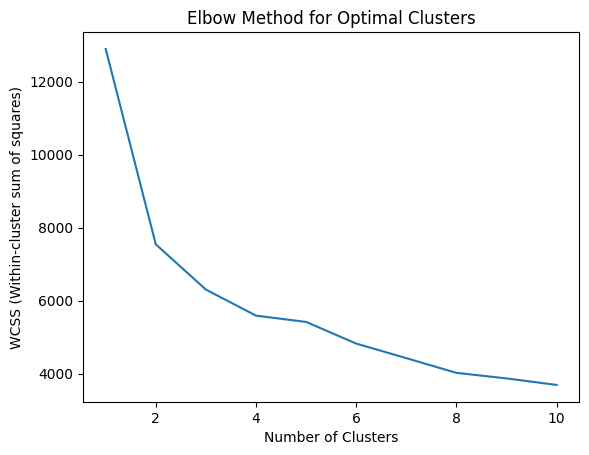

    Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0  58138.0        0         0       58       635         88              546   
1  46344.0        1         1       38        11          1                6   
2  71613.0        0         0       26       426         49              127   
3  26646.0        1         0       26        11          4               20   
4  58293.0        1         0       94       173         43              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  ...  marital_Widow  \
0              172                88            88  ...              0   
1                2                 1             6  ...              0   
2              111                21            42  ...              0   
3               10                 3             5  ...              0   
4               46                27            15  ...              0   

   education_2n Cycle  education_Basic  education_Graduation  \
0         

In [ ]:
# 1. Select relevant features for segmentation
features = cns_df1[['Recency', 'MntTotal', 'NumWebPurchases', 'NumStorePurchases', 'NumCatalogPurchases', 'AcceptedCmpOverall', 'Income']]

# 2. Data Preprocessing: Scale the data to standardize it
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# 3. Determine the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot the Elbow graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-cluster sum of squares)')
plt.show()

# 4. Apply K-means Clustering with the optimal number of clusters (for example, K=3)
optimal_clusters = 3  # You can select this based on the elbow method graph
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# 5. Add the cluster labels to the original dataset
cns_df1['Cluster'] = clusters

# Display the first few rows of the dataset with the cluster labels
print(cns_df1.head())

**Data Visualization**


1. Scatter Plot


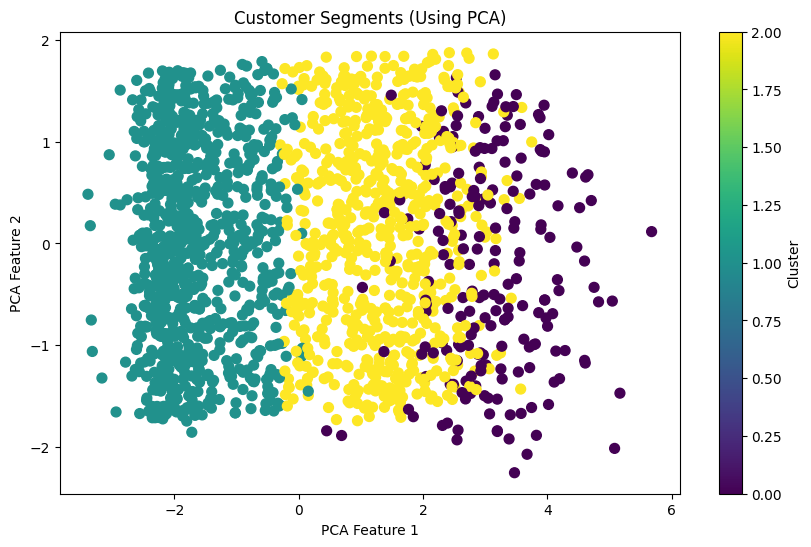

In [ ]:
# 1. Scatter Plot using PCA (to reduce dimensions)
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

plt.figure(figsize=(10, 6))
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=cns_df1['Cluster'], cmap='viridis', s=50)
plt.title('Customer Segments (Using PCA)')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.colorbar(label='Cluster')
plt.show()

2. Bar Chart

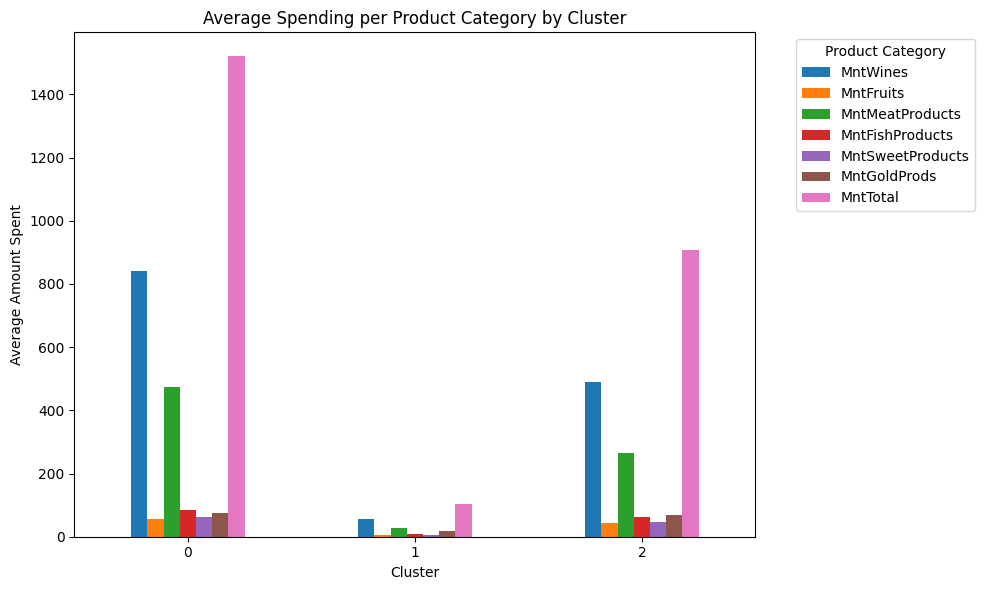

In [ ]:
# 2. Bar Chart for Average Spending per Cluster
cluster_means = cns_df1.groupby('Cluster')[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'MntTotal']].mean()

cluster_means.plot(kind='bar', figsize=(10, 6))
plt.title('Average Spending per Product Category by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Amount Spent')
plt.xticks(rotation=0)
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

3. Pie Chart

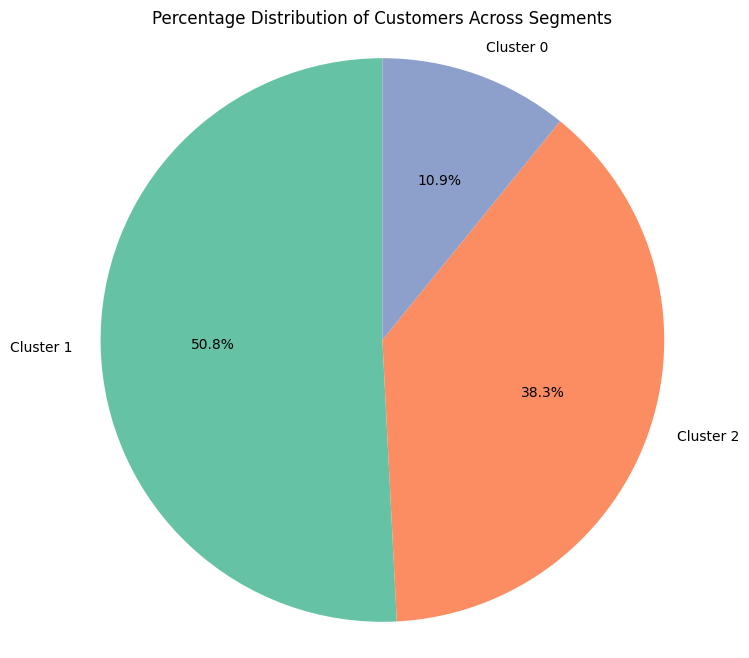

In [ ]:
# 1. Calculate the percentage distribution of customers in each cluster
cluster_counts = cns_df1['Cluster'].value_counts()
cluster_percentages = (cluster_counts / cluster_counts.sum()) * 100

# 2. Create a Pie Chart with labels showing cluster number and percentage
plt.figure(figsize=(8, 8))
plt.pie(cluster_percentages, labels=[f'Cluster {i}' for i in cluster_percentages.index], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2', len(cluster_percentages)))
plt.title('Percentage Distribution of Customers Across Segments')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

4. Heatmap

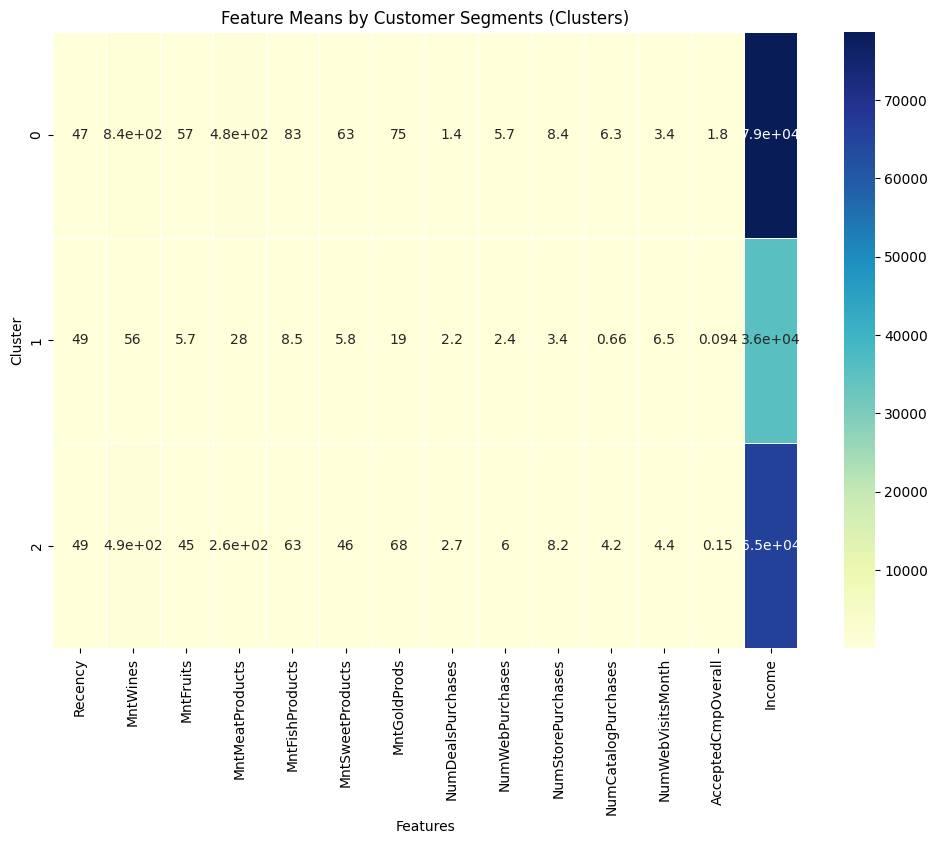

In [ ]:
# 1. Group by clusters and calculate mean values for each feature
cluster_means = cns_df1.groupby('Cluster').mean()

# 2. Select features relevant for the heatmap visualization
features_for_heatmap = ['Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                        'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
                        'NumStorePurchases', 'NumCatalogPurchases', 'NumWebVisitsMonth',
                        'AcceptedCmpOverall', 'Income']

# 3. Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_means[features_for_heatmap], annot=True, cmap="YlGnBu", linewidths=0.5)
plt.title('Feature Means by Customer Segments (Clusters)')
plt.xlabel('Features')
plt.ylabel('Cluster')
plt.show()